# Part I: Analysis and Characterization of surface waters in South Africa

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, Math, Latex
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#warnings
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import altair as alt

In [2]:
# Load the complete file created in the previous Notebook:
chemical_stations=pd.read_excel("chemical_WQI_ICI_stations.xlsx")
chemical_stations.head()

,POINT ID,DATE,River/Lake/Dam,Locality Description of Sample Station,Latitude (degrees),Longitude (degrees),Number Samples,Subdrainage Region,Drainage Region,YEAR,EC (μS/cm),PH,TDS (mg/L),Na (mg/L),Mg (mg/L),Ca (mg/L),F (mg/L),Cl (mg/L),NO2+NO3 (mg/L),SO4 (mg/L),PO4 (mg/L),TAL (CaCO3) (mg/L),Si (mg/L),K (mg/L),NH4 (mg/L),[Na] (mmol/L),[Mg] (mmol/L),[Ca] (mmol/L),[F] (mmol/L),[Cl] (mmol/L),[NO3] (mmol/L),[SO4] (mmol/L),[PO4] (mmol/L),[Si] (mmol/L),[K] (mmol/L),[NH4] (mmol/L),[TAL] (mmol/L),[HCO3] (mmol/L),[CO3] (mmol/L),2[SO4],[Cl],SAR,HCO3 (mg/L),WQI,Class WQI,ICI (%),Class ICI,Class SAR
0,90160,1976-04-20,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,1533,A23,A,1976,366.0,7.83,267.0,24.1,18.2,22.0,0.57,19.7,0.04,19.6,0.014,130.7,4.33,3.47,0.01,1.047826,0.748971,0.548628,0.030000,0.554930,0.000645,0.203954,0.000147,0.154093,0.088747,0.000556,1.307,2.596404,0.008798,11.404165,15.514532,0.919854,158.380632,33.716337,Excellent,27.074050,Rock dominance,Very good water quality
1,90160,1976-04-27,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,1533,A23,A,1976,380.0,7.78,280.0,25.6,19.2,22.8,0.57,19.0,0.04,20.4,0.004,138.3,4.06,3.54,0.02,1.113043,0.790123,0.568579,0.030000,0.535211,0.000645,0.212279,0.000042,0.144484,0.090537,0.001111,1.383,2.749393,0.008303,11.395173,14.365124,0.954883,167.712993,34.836136,Excellent,25.891041,Rock dominance,Very good water quality
2,90160,1976-05-18,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,1533,A23,A,1976,372.0,7.48,269.0,22.8,17.2,23.9,0.44,18.8,0.29,17.9,0.007,134.3,5.59,2.91,0.08,0.991304,0.707819,0.596010,0.023158,0.529577,0.004677,0.186264,0.000074,0.198932,0.074425,0.004444,1.343,2.677893,0.004053,10.382320,14.759249,0.868154,163.351497,31.462083,Excellent,25.300708,Rock dominance,Very good water quality
3,90160,1976-05-25,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,1533,A23,A,1976,367.0,7.43,269.0,22.9,17.9,23.8,0.48,19.4,0.39,18.1,0.004,132.7,5.46,3.03,0.08,0.995652,0.736626,0.593516,0.025263,0.546479,0.006290,0.188345,0.000042,0.194306,0.077494,0.004444,1.327,2.646859,0.003571,10.530419,15.276851,0.863294,161.458381,32.372463,Excellent,25.991911,Rock dominance,Very good water quality
4,90160,1976-06-01,RIVER,PIENAARS RIVER AT KLIPDRIFT,-25.3806,28.3167,1533,A23,A,1976,383.0,7.34,279.0,24.3,18.5,24.5,0.53,19.9,0.56,18.1,0.007,137.6,5.13,3.03,0.10,1.056522,0.761317,0.610973,0.027895,0.560563,0.009032,0.188345,0.000074,0.182562,0.077494,0.005556,1.376,2.745978,0.003011,10.210491,15.194491,0.901894,167.504656,34.027075,Excellent,25.633347,Rock dominance,Very good water quality


### Temporal and spatial bias

Distribution of samples by year and by regions:

In [3]:
# Group samples by year:
samples_year=chemical_stations.groupby("YEAR")["YEAR"].count()
print(samples_year.sort_values(ascending=False))
# Group samples by regions:
samples_region=chemical_stations.groupby("Drainage Region")["Drainage Region"].count()
print(samples_region.sort_values(ascending=False))

YEAR
1999    9946
2001    9409
2000    8410
1997    8348
1998    7879
1996    7873
2005    7499
2007    7427
1995    7400
2002    7339
1989    7307
2006    7280
1994    7269
2004    7170
2003    6744
1993    6679
1988    6320
1992    6041
1987    5793
1990    5650
1986    5335
1991    4551
1981    4424
1980    4269
1977    4189
1985    4145
1982    3757
1983    3355
1978    3328
1984    2993
2008    2496
1976    1815
2010    1607
1979    1459
2011    1388
2009     241
Name: YEAR, dtype: int64
Drainage Region
C    69674
A    46964
B    25056
H     8544
D     7536
G     7496
Q     6817
J     4832
X     3020
W     2905
R     2572
N     2458
S     1642
P     1639
L     1585
K     1464
V     1340
U      523
E      424
M      345
T      299
Name: Drainage Region, dtype: int64


There are many more samples measured before 2005, after which they decrease considerably. Similarly, the largest number of samples are collected at stations A, B and C.

Text(0.5, 1.0, 'Number of samples per Region')

<Figure size 432x288 with 0 Axes>

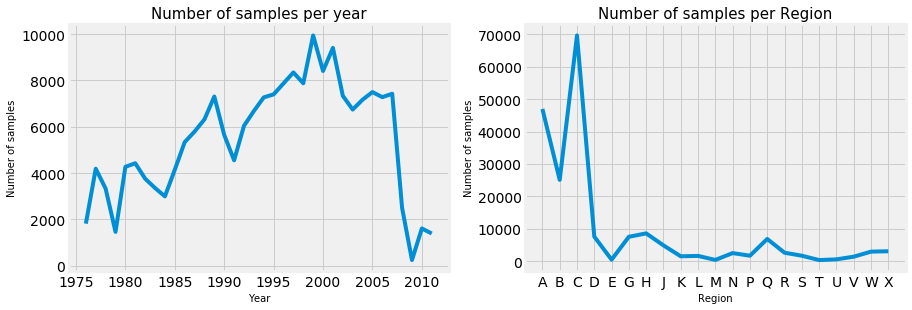

In [4]:
fig = plt.figure()
plt.figure(figsize=(15,10))
plt.style.use('fivethirtyeight')

# Número de muestras por año
plt.subplot2grid((2,2), (0,0))
plt.plot(samples_year)
plt.xlabel("Year", size=10)
plt.ylabel("Number of samples", size=10)
plt.title("Number of samples per year", size=15)

# Número de muestras por región 
plt.subplot2grid((2,2), (0,1))
plt.plot(samples_region)
plt.xlabel("Region", size=10)
plt.ylabel("Number of samples", size=10)
plt.title("Number of samples per Region", size=15)

## Statistical tables of the WQI and ICI

### WQI statistical table

In [5]:
# Number of samples from each WQI group
chemical_stations.groupby("Class WQI")["Class WQI"].count()

Class WQI
Excellent     123147
Good           52016
Poor           14585
Unsuitable      2975
Very Poor       4412
Name: Class WQI, dtype: int64

In [6]:
# Create the classification groups:
Excellent=chemical_stations[(chemical_stations["WQI"]<=50)]
Good=chemical_stations[(chemical_stations["WQI"]>50) & (chemical_stations["WQI"]<=100)]
Poor=chemical_stations[(chemical_stations["WQI"]>100) & (chemical_stations["WQI"]<=200)]
Very_poor=chemical_stations[(chemical_stations["WQI"]>200) & (chemical_stations["WQI"]<=300)]
Unsuitable=chemical_stations[chemical_stations["WQI"]>300]

# Table with the statistical results of the WQI:
WQI_statistics=pd.DataFrame({"Water quality clasification": ["Excelent", "Good water", "Poor water",
                                                            "Very poor water", "Water unsuitable for drinking purpose"],
                             "Index Value": ["0-50","50-100","100-200","200-300",">300"],
                            "number of samples":[len(Excellent), len(Good),
                                                 len(Poor),len(Very_poor),len(Unsuitable)],
                            "%": [len(Excellent)*100/len(chemical_stations), len(Good)*100/len(chemical_stations),
                            len(Poor)*100/len(chemical_stations), len(Very_poor)*100/len(chemical_stations),
                             len(Unsuitable)*100/len(chemical_stations)]
                                                        }) 
WQI_statistics

,Water quality clasification,Index Value,number of samples,%
0,Excelent,0-50,123147,62.468359
1,Good water,50-100,52016,26.385979
2,Poor water,100-200,14585,7.398483
3,Very poor water,200-300,4412,2.238060
4,Water unsuitable for drinking purpose,>300,2975,1.509118


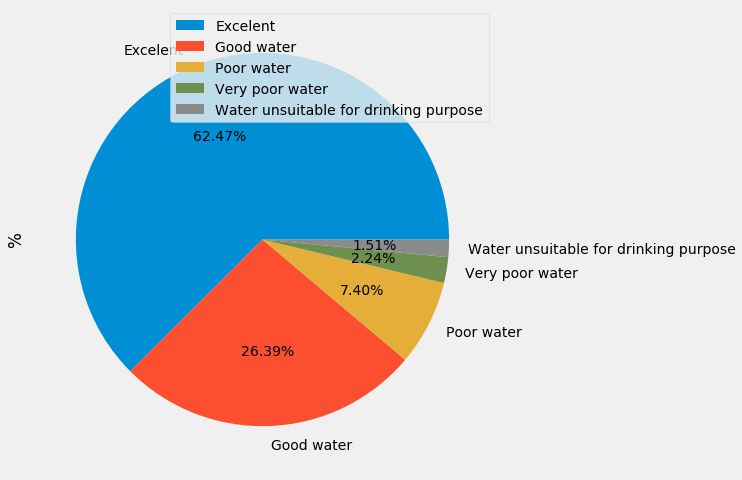

In [7]:
#Let's plot the results obtained
WQI_statistics.plot.pie(y='%', labels=WQI_statistics['Water quality clasification'], autopct = "%.2f%%", figsize=(8,8))

Surprisingly, the vast majority of samples have good quality, just over 11% of the samples have a WQI> 100.

### ICI statistical table

In [8]:
# Table with the statistical results of the ICI:
samples_ICI_less_30=chemical_stations[chemical_stations["ICI (%)"]<30]
samples_ICI_between_30_70=chemical_stations[(chemical_stations["ICI (%)"]>30) & (chemical_stations["ICI (%)"]<70)]
samples_ICI_more_70=chemical_stations[chemical_stations["ICI (%)"]>70]
ICI_statistics=pd.DataFrame({"ICI (%)": ["Rock dominance", "Mix", "Non-weathering dominated"],
                             "Number of samples":[len(samples_ICI_less_30),
                                                  len(samples_ICI_between_30_70),
                                                  len(samples_ICI_more_70) ],
                 "%": [len(samples_ICI_less_30)*100/len(chemical_stations),
                                     len(samples_ICI_between_30_70)*100/len(chemical_stations),
                                      len(samples_ICI_more_70)*100/len(chemical_stations)]
                                                      })
ICI_statistics

,ICI (%),Number of samples,%
0,Rock dominance,47911,24.303650
1,Mix,98827,50.131636
2,Non-weathering dominated,50397,25.564715


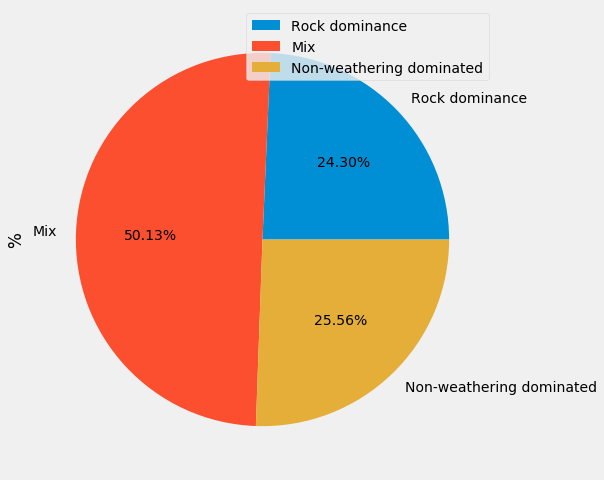

In [9]:
#Let's plot the results obtained:
ICI_statistics.plot.pie(y='%', labels=ICI_statistics['ICI (%)'], autopct = "%.2f%%", figsize=(8,8))

### Division of the regions according to their ICI

The primary catchment areas (A, B, C, ..., X) can be grouped into 3 different groups, according to the value of their division factor, which is given by the number of samples with ICI> = 70 divided by the number of samples with ICI <= 30.

If:

$\frac{ICI>=70%}{ICI<=30%}>2$ : Water chemistry is not controlled by chemical weathering

$0.5<\frac{ICI>=70%}{ICI<=30%}>2$: Water chemistry is controlled by chemical weathering and alternative sources

$\frac{ICI>=70%}{ICI<=30%}<0.5$: Water chemistry is controlled by chemical weathering

In [10]:
# Create a new column with these intervals:
limits=[0,30,70,100]
chemical_stations["ICI intervals"]=pd.cut(chemical_stations["ICI (%)"], limits)
chemical_stations.groupby("Drainage Region")["ICI intervals"].value_counts()

Drainage Region  ICI intervals
A                (30.0, 70.0]     36233
                 (0.0, 30.0]       9220
                 (70.0, 100.0]     1503
B                (30.0, 70.0]     10460
                 (0.0, 30.0]       8809
                 (70.0, 100.0]     5727
C                (30.0, 70.0]     32421
                 (0.0, 30.0]      20794
                 (70.0, 100.0]    16347
D                (0.0, 30.0]       4523
                 (30.0, 70.0]      2895
                 (70.0, 100.0]      118
E                (70.0, 100.0]      328
                 (30.0, 70.0]        59
                 (0.0, 30.0]         37
G                (70.0, 100.0]     6365
                 (30.0, 70.0]      1125
                 (0.0, 30.0]          5
H                (70.0, 100.0]     7913
                 (30.0, 70.0]       628
                 (0.0, 30.0]          3
J                (70.0, 100.0]     3038
                 (30.0, 70.0]      1533
                 (0.0, 30.0]        261
K        

In [11]:
# Calculate the Division Factor:
Regions_ICI_more_70=chemical_stations.groupby("Drainage Region")["ICI (%)"].apply(lambda x: (x>=70).sum())
Regions_ICI_less_30=chemical_stations.groupby("Drainage Region")["ICI (%)"].apply(lambda x: (x<=30).sum())
Regions_ICI_between_30_70=chemical_stations.groupby("Drainage Region")["ICI (%)"].apply(lambda x:((x>=30) & (x<=70)).sum())

# Division Factor:
Factor_ICI=Regions_ICI_more_70.divide(Regions_ICI_less_30)
Factor_ICI

Drainage Region
A       0.163883
B       0.656942
C       0.791526
D       0.026089
E       8.864865
G    1273.200000
H    2637.666667
J      11.639847
K            inf
L            inf
M            inf
N      48.281250
P            inf
Q       0.977049
R      31.000000
S       0.002081
T       0.004274
U       3.263158
V       0.154494
W       2.483333
X       0.002801
Name: ICI (%), dtype: float64

In [12]:
# Summary table of Division Factor:
table_ICI=pd.DataFrame({"Factor_ICI": Regions_ICI_more_70.divide(Regions_ICI_less_30)})

# Create the Division Factor classes:
col="Factor_ICI"
conditions=[table_ICI[col]>2,
            (table_ICI[col]>0.5) & (table_ICI[col]<2),
            table_ICI[col]<0.5]  
choices=["Non-weathering dominated", "Mix","Rock dominance"]
table_ICI["Class_ICI"]=np.select(conditions, choices, default=np.nan)
table_ICI.reset_index(inplace=True)
table_ICI

,Drainage Region,Factor_ICI,Class_ICI
0,A,0.163883,Rock dominance
1,B,0.656942,Mix
2,C,0.791526,Mix
3,D,0.026089,Rock dominance
4,E,8.864865,Non-weathering dominated
5,G,1273.200000,Non-weathering dominated
6,H,2637.666667,Non-weathering dominated
7,J,11.639847,Non-weathering dominated
8,K,inf,Non-weathering dominated
9,L,inf,Non-weathering dominated


In [13]:
# Obtain the regions classified by the value of the ICI
print(table_ICI[["Class_ICI", "Drainage Region"]].groupby("Class_ICI")["Drainage Region"].count())
table_ICI.groupby("Class_ICI")["Drainage Region"].unique()

Class_ICI
Mix                          3
Non-weathering dominated    12
Rock dominance               6
Name: Drainage Region, dtype: int64


Class_ICI
Mix                                                    [B, C, Q]
Non-weathering dominated    [E, G, H, J, K, L, M, N, P, R, U, W]
Rock dominance                                [A, D, S, T, V, X]
Name: Drainage Region, dtype: object

### SAR statistical table

In [14]:
# Number of samples from each WQI group
chemical_stations.groupby("Class SAR")["Class SAR"].count()

Class SAR
Fair water quality           9190
Good water quality          49631
Poor water quality           1318
Very good water quality    136996
Name: Class SAR, dtype: int64

In [16]:
# Create the classification groups:
Very_good=chemical_stations[(chemical_stations["SAR"]<=2)]
Good=chemical_stations[(chemical_stations["SAR"]>2) & (chemical_stations["WQI"]<8)]
Fair=chemical_stations[(chemical_stations["SAR"]>8) & (chemical_stations["SAR"]<=15)]
Poor=chemical_stations[(chemical_stations["SAR"]>15)]
                       
# Table with the statistical results of the SAR:
SAR_statistics=pd.DataFrame({"SAR clasification": ["Very Good water", "Good water", "Fair water",
                                                            "Poor water"],
                             "Index Value": ["0-2","2-8","8-15",">15"],
                            "number of samples":[len(Very_good), len(Good),
                                                 len(Fair),len(Poor)],
                            "%": [len(Very_good)*100/len(chemical_stations), len(Good)*100/len(chemical_stations),
                            len(Fair)*100/len(chemical_stations), len(Poor)*100/len(chemical_stations)
                             ]
                                                        }) 
SAR_statistics

,SAR clasification,Index Value,number of samples,%
0,Very Good water,0-2,136996,69.493494
1,Good water,2-8,13,0.006594
2,Fair water,8-15,9190,4.661780
3,Poor water,>15,1318,0.668577


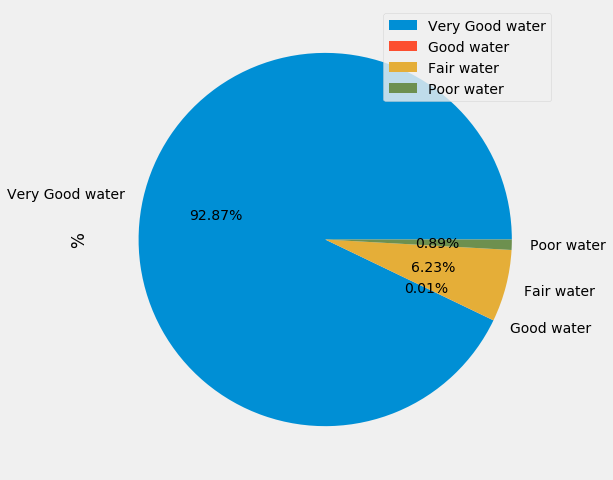

In [17]:
#Let's plot the results obtained:
SAR_statistics.plot.pie(y='%', labels=SAR_statistics['SAR clasification'], autopct = "%.2f%%", figsize=(8,8))